In [2]:
NUM_OF_TEXT = 200
MUTATION, REAL, SYNTHETIC = 0, 1, 2

MUTATION_FILE = './data/Test_WikiMutationFullSet.json'
HUMAN_FILE = './data/Test_WikiHumanFullSet.json'
SYNTHETIC_FILE = './data/Test_WikiSyntheticFullSet.json'

In [3]:
from utils2 import load_standard_json
import random
mutation_list = load_standard_json(MUTATION_FILE, True)
human_list = load_standard_json(HUMAN_FILE, True)
synthetic_list = load_standard_json(SYNTHETIC_FILE, True)


random.shuffle(mutation_list)
random.shuffle(human_list)
random.shuffle(synthetic_list)

In [4]:
import torch
from classifier_testing.detector import Detector

device = torch.device("cpu")
detector = Detector("./base_9.pt")
detector.model.to(device)
detector.model.eval()

Initializing Detector...


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm

In [5]:
X, Y, Y_pred = [], [], []
def populatePredictions(text_list : list, label : int):
    global X, Y, Y_pred, NUM_OF_TEXT
    for text in text_list[:NUM_OF_TEXT]:
        text_to_use = detector.tokenizer.decode(
            detector.tokenizer.encode(text, max_length=detector.tokenizer.max_len))[3:-4]
        probs = detector.predict(text_to_use)
        pred = probs.tolist().index(max(probs))
        X.append(text_to_use)
        Y_pred.append(pred)
        Y.append(label)
populatePredictions(mutation_list, 0)
populatePredictions(human_list, 1)
populatePredictions(synthetic_list, 2)

C:\Users\jesse\AppData\Roaming\Python\Python37\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


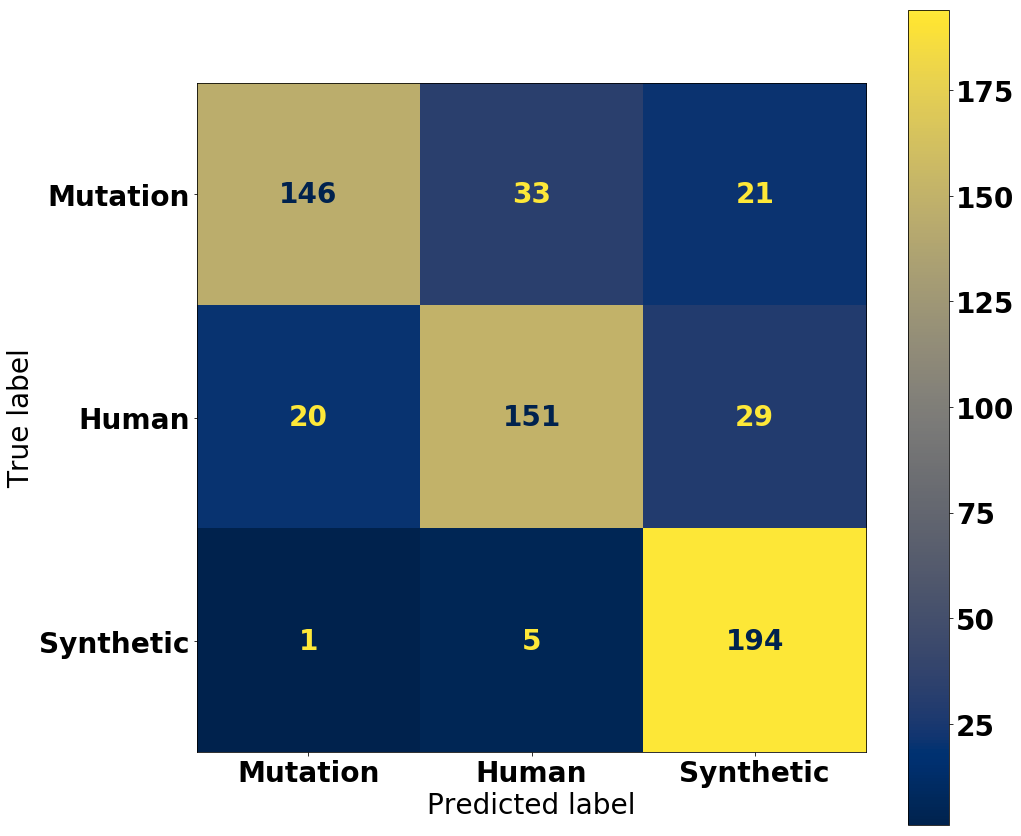

In [7]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y, Y_pred),
                              display_labels=["Mutation", "Human", "Synthetic"])
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,15))
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=True,
                 cmap='cividis', ax=ax, xticks_rotation='horizontal')


plt.show()